# Heart Attack Analysis & Prediction Dataset

## Sobre o conjunto de dados

As doenças cardiovasculares (DCV) são a causa número 1 de morte em todo o mundo, matando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro em cada cinco mortes por DCV são devidas a ataques cardíacos e acidentes vasculares cerebrais, e um terço destas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.

Pessoas com doenças cardiovasculares ou que apresentam alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) necessitam de detecção e gestão precoces, onde um modelo de aprendizagem automática pode ser de grande ajuda.

### Contexto

*Age*: idade do paciente [anos]

*Sex*: sexo do paciente [M: Masculino, F: Feminino]

*ChestPainType*: tipo de dor torácica [TA: Angina típica, ATA: Angina atípica, NAP: Dor não anginosa, ASY: Assintomática]

RestingBP: pressão arterial em repouso [mm Hg]

*Colesterol*: colesterol sérico [mm/dl]

*FastingBS*: glicemia em jejum [1: se BS em jejum > 120 mg/dl, 0: caso contrário]

*RestingECG*: resultados do eletrocardiograma em repouso [Normal: Normal, ST: com anormalidade das ondas ST-T (inversões das ondas T e/ou elevação ou depressão de ST > 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]

*MaxHR*: frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]

*ExerciseAngina*: angina induzida por exercício [Y: Sim, N: Não]

*Oldpeak*: oldpeak = ST [Valor numérico medido na depressão]

*ST_Slope*: a inclinação do segmento ST do pico do exercício [Up: subida, Flat: flat, Down: downsloping]

*HeartDisease*: classe de saída [1: doença cardíaca, 0: Normal]

### Fonte do dataset

Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

## Problema de negócio

Os exames médicos podem representar um desafio para muitas pessoas em todo o mundo, seja devido aos altos custos, longos períodos de espera ou à falta de acesso a instalações médicas. No entanto, o avanço do machine learning e da inteligência artificial na área da saúde oferece uma solução promissora para essa questão. Essas tecnologias capacitam os profissionais de saúde a analisar grandes volumes de dados médicos de forma rápida e precisa, permitindo a detecção precoce de doenças e condições médicas. Isso não apenas possibilita tratamentos mais eficazes, mas também oferece a oportunidade de prevenir doenças antes mesmo que elas se manifestem. Além disso, o uso dessas tecnologias pode agilizar todo o processo de diagnóstico e tratamento, reduzindo o tempo necessário para iniciar intervenções médicas essenciais. Em última análise, o emprego do machine learning e da inteligência artificial na saúde não apenas torna os exames médicos mais acessíveis e eficientes, mas também pode salvar vidas ao prevenir doenças e promover intervenções médicas oportunas.

No problema em questão, vamos tentar prever quais pessoas poderão vir a ter problemas cardíacos.

## Importação de bibliotecas e carregamento do dataframe

In [1]:
# Biblioteca de manipulação de dados
import pandas as pd

# Biblioteca matemática
import numpy as np

# Bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

# Bibliotecas metricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

# Bibliotecas de Machine Learning
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
# Importando DataFrame
url = r'https://raw.githubusercontent.com/MARINHOALEX/previsao-de-insuficiencia-cardiaca/main/heart.csv'
df = pd.read_csv(url)

## Exploração e analise de dados

In [3]:
display(df.head())
print(df.shape)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


(918, 12)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Não existem valores nulos. Vou avaliar as labels separadamente

In [5]:
# Analisando colunas do tipo 'Objeto'
for i in df.columns[df.dtypes == 'object']:
    print(f'Coluna {i}')
    print(df[i].value_counts())
    print('-'*50)
    

Coluna Sex
M    725
F    193
Name: Sex, dtype: int64
--------------------------------------------------
Coluna ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
--------------------------------------------------
Coluna RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
--------------------------------------------------
Coluna ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64
--------------------------------------------------
Coluna ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
--------------------------------------------------


Como são poucas variáveis em cada uma das colunas, na etapa de pré-processamento, vou transformar em valores numericos utilizando dicionário, para saber o que sgnifica cada valor.

In [6]:
# Definindo função para analise da labels
def column_analysis(coluna):
    print(f'Coluna: {coluna}\n')
    print(f'Quantidade de valores unicos: {df[coluna].nunique()}')
    print(f'Quantidade de valores nulos: {df[coluna].isnull().sum()}')
    print(f'Valores que mais de repetem:\n{df[coluna].value_counts().head()}')
    print('_'*50)
    print(f'Moda: {df[coluna].mode()[0]}')
    print(f'Est. descritivas:\n{df[coluna].describe()}')
    print('_'*50)
    plt.figure(figsize=(12,5))
    if df[coluna].value_counts().shape[0] > 5:
        sns.histplot(df,
                     x=coluna,
                     bins=100,
                     kde=True,
                     hue='HeartDisease');
        plt.title(coluna)
        plt.show()
    else:
        sns.countplot(data=df,
                    x=coluna,
                    hue='HeartDisease');
        plt.title(coluna)
        plt.show()
        percent_exit = (df[df.HeartDisease == 1][coluna].value_counts() / df[df.HeartDisease == 1].shape[0])
        print(f'Percentual de saída por categoria:\n{percent_exit}')

Coluna: Age

Quantidade de valores unicos: 50
Quantidade de valores nulos: 0
Valores que mais de repetem:
54    51
58    42
55    41
57    38
56    38
Name: Age, dtype: int64
__________________________________________________
Moda: 54
Est. descritivas:
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64
__________________________________________________


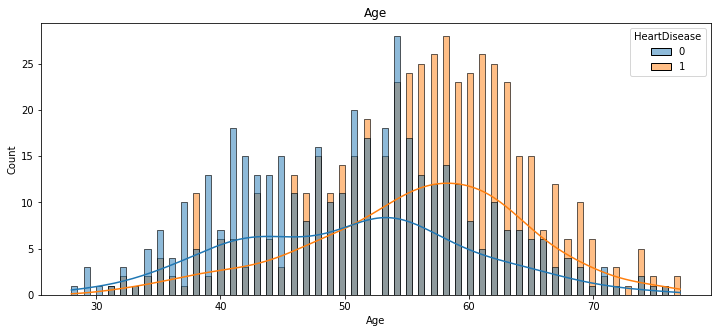

In [7]:
column_analysis('Age')

A idade segue uma distribuição proxima de normal, porem vemos que os casos de doenças cardíacas são mais comuns após os 55 anos.

Coluna: Sex

Quantidade de valores unicos: 2
Quantidade de valores nulos: 0
Valores que mais de repetem:
M    725
F    193
Name: Sex, dtype: int64
__________________________________________________
Moda: M
Est. descritivas:
count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object
__________________________________________________


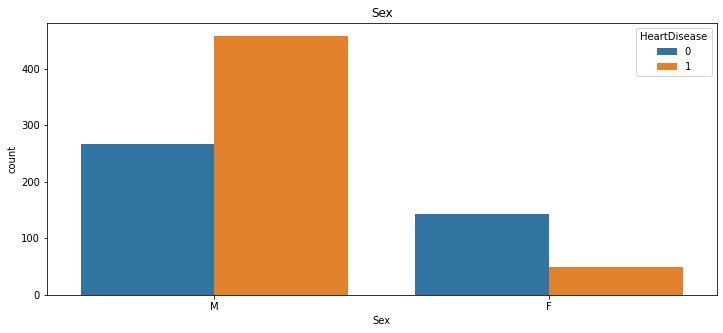

Percentual de saída por categoria:
M    0.901575
F    0.098425
Name: Sex, dtype: float64


In [8]:
column_analysis('Sex')

Os homens apresentam problemas na maioria dos caso. Vou analisar mais detalhadamente.

In [9]:
print('Percentual de mulheres com doença cardíaca')
print(f'{(df[(df.Sex == df.Sex.unique()[1]) & (df.HeartDisease == 1)].shape[0] / df[df.Sex == df.Sex.unique()[1]].shape[0])*100:.2f}%\n')
print('Percentual de homens com doença cardíaca')
print(f'{(df[(df.Sex == df.Sex.unique()[0]) & (df.HeartDisease == 1)].shape[0] / df[df.Sex == df.Sex.unique()[0]].shape[0])*100:.2f}%')

Percentual de mulheres com doença cardíaca
25.91%

Percentual de homens com doença cardíaca
63.17%


Coluna: ChestPainType

Quantidade de valores unicos: 4
Quantidade de valores nulos: 0
Valores que mais de repetem:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
__________________________________________________
Moda: ASY
Est. descritivas:
count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object
__________________________________________________


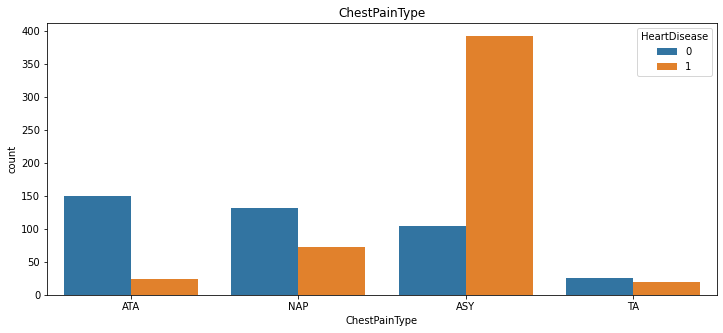

Percentual de saída por categoria:
ASY    0.771654
NAP    0.141732
ATA    0.047244
TA     0.039370
Name: ChestPainType, dtype: float64


In [10]:
column_analysis('ChestPainType')

O tipo de dor torácica *ASY, assintomática*, é um forte indicador de problemas cardiacos, representando a maioria dos casos.

Coluna: RestingBP

Quantidade de valores unicos: 67
Quantidade de valores nulos: 0
Valores que mais de repetem:
120    132
130    118
140    107
110     58
150     55
Name: RestingBP, dtype: int64
__________________________________________________
Moda: 120
Est. descritivas:
count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64
__________________________________________________


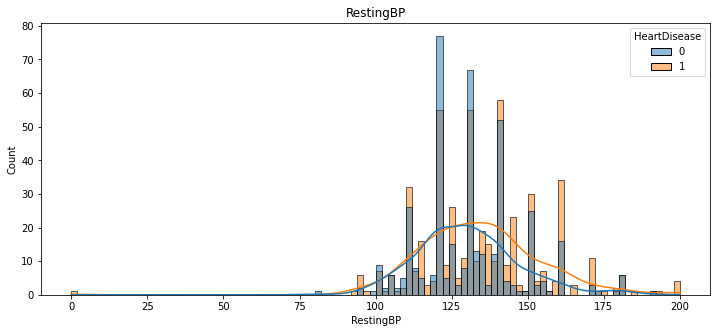

In [11]:
column_analysis('RestingBP')

Na coluna RestingBP temos medidas de pressão arterial em repouso com valor 0, o que certamente está errado.

Coluna: Cholesterol

Quantidade de valores unicos: 222
Quantidade de valores nulos: 0
Valores que mais de repetem:
0      172
254     11
223     10
220     10
211      9
Name: Cholesterol, dtype: int64
__________________________________________________
Moda: 0
Est. descritivas:
count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64
__________________________________________________


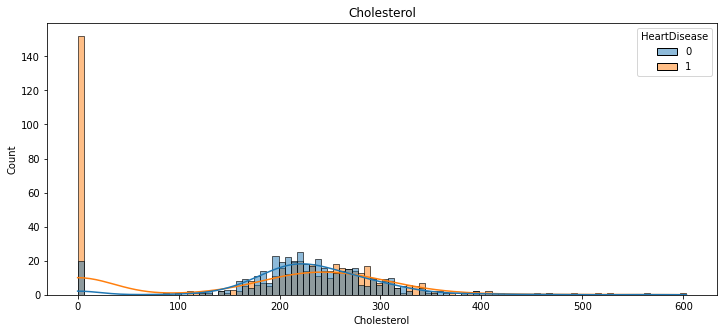

In [12]:
column_analysis('Cholesterol')

A coluna *Cholesterol* apresenta dados inválidos. Um total de 171 valores 0 para colesterol, o que é errado, visto que o colesterol normalmente apresenta valores minimos proximos de 100 mm/dl.

Como o gráfico apresenta uma distribuição proxima de normal, vou substituir esses valores pela média.

Coluna: FastingBS

Quantidade de valores unicos: 2
Quantidade de valores nulos: 0
Valores que mais de repetem:
0    704
1    214
Name: FastingBS, dtype: int64
__________________________________________________
Moda: 0
Est. descritivas:
count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64
__________________________________________________


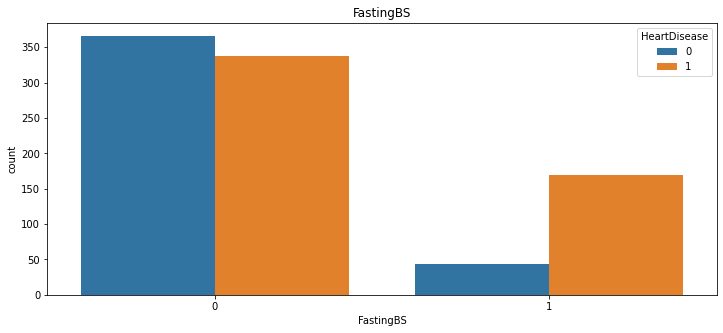

Percentual de saída por categoria:
0    0.665354
1    0.334646
Name: FastingBS, dtype: float64


In [13]:
column_analysis('FastingBS')

Nos casos em que a glicemia em jejum é maior que 120mg/dl, a proporção de casos da doença é muito maior.

Coluna: RestingECG

Quantidade de valores unicos: 3
Quantidade de valores nulos: 0
Valores que mais de repetem:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
__________________________________________________
Moda: Normal
Est. descritivas:
count        918
unique         3
top       Normal
freq         552
Name: RestingECG, dtype: object
__________________________________________________


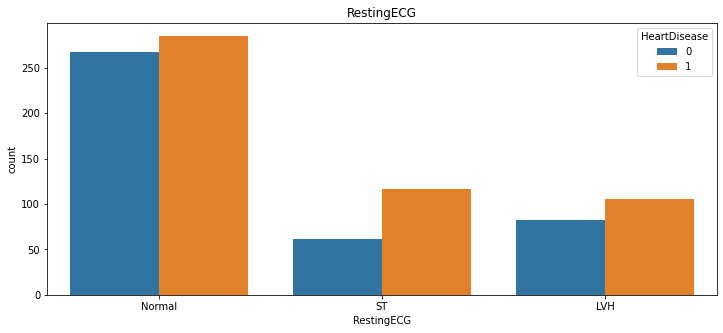

Percentual de saída por categoria:
Normal    0.561024
ST        0.230315
LVH       0.208661
Name: RestingECG, dtype: float64


In [14]:
column_analysis('RestingECG')

Na label *RestingECG*, (eletrocardiograma em repouso), os paciente que apresentaram resultado *ST: com anormalidade das ondas*, são minoria entre o geral, mas proporcionalmente mais sucetiveios a problemas cardiacos.

Coluna: MaxHR

Quantidade de valores unicos: 119
Quantidade de valores nulos: 0
Valores que mais de repetem:
150    43
140    41
120    36
130    33
160    25
Name: MaxHR, dtype: int64
__________________________________________________
Moda: 150
Est. descritivas:
count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64
__________________________________________________


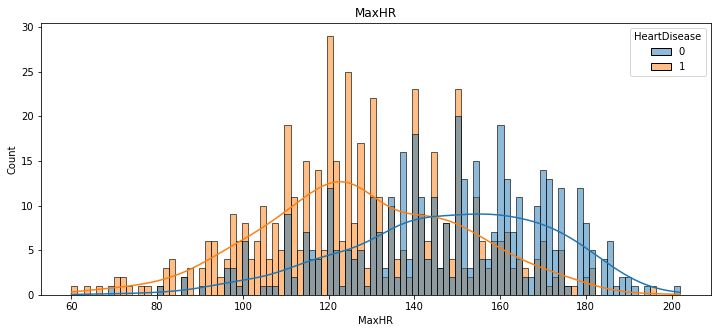

In [15]:
column_analysis('MaxHR')

O numero de infarto foi maior entre os paciente com menor frequencia cardiaca alcançada.

Coluna: ExerciseAngina

Quantidade de valores unicos: 2
Quantidade de valores nulos: 0
Valores que mais de repetem:
N    547
Y    371
Name: ExerciseAngina, dtype: int64
__________________________________________________
Moda: N
Est. descritivas:
count     918
unique      2
top         N
freq      547
Name: ExerciseAngina, dtype: object
__________________________________________________


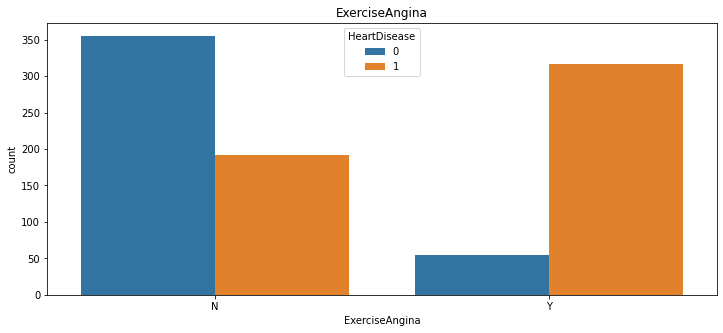

Percentual de saída por categoria:
Y    0.622047
N    0.377953
Name: ExerciseAngina, dtype: float64


In [16]:
column_analysis('ExerciseAngina')

*Angina (dor no lado esquerdo do peito)* está altamente relacionada aos caso de problemas cardiácos

Coluna: Oldpeak

Quantidade de valores unicos: 53
Quantidade de valores nulos: 0
Valores que mais de repetem:
0.0    368
1.0     86
2.0     76
1.5     53
3.0     28
Name: Oldpeak, dtype: int64
__________________________________________________
Moda: 0.0
Est. descritivas:
count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64
__________________________________________________


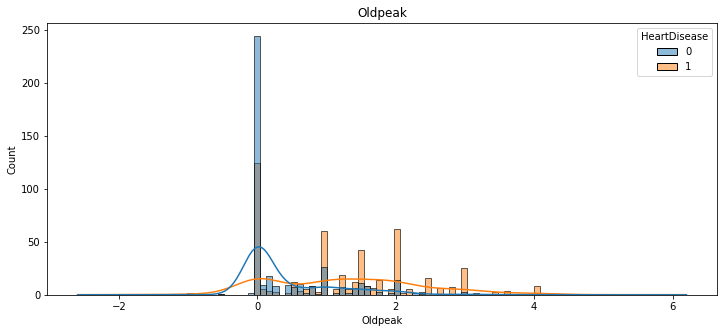

In [17]:
column_analysis('Oldpeak')

Coluna: ST_Slope

Quantidade de valores unicos: 3
Quantidade de valores nulos: 0
Valores que mais de repetem:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
__________________________________________________
Moda: Flat
Est. descritivas:
count      918
unique       3
top       Flat
freq       460
Name: ST_Slope, dtype: object
__________________________________________________


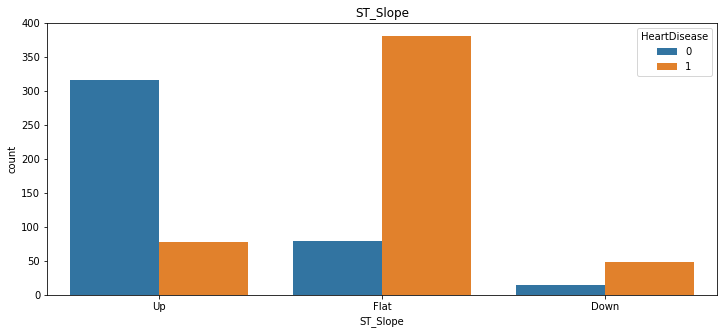

Percentual de saída por categoria:
Flat    0.750000
Up      0.153543
Down    0.096457
Name: ST_Slope, dtype: float64


In [18]:
column_analysis('ST_Slope')

Esse termo se referente a leitura de determinadas ondas em um eletrocardiograma.
o segmento ST não mostra uma inclinação clara para cima ou para baixo durante o exercício. Isso pode ser interpretado de diferentes maneiras, dependendo do contexto clínico e do paciente.

Mas nesse caso conjunto de dados, é um forte indicador de problemas de coração.

Coluna: HeartDisease

Quantidade de valores unicos: 2
Quantidade de valores nulos: 0
Valores que mais de repetem:
1    508
0    410
Name: HeartDisease, dtype: int64
__________________________________________________
Moda: 1
Est. descritivas:
count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64
__________________________________________________


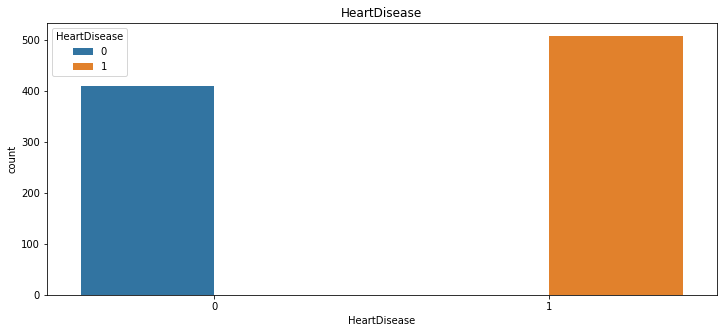

Percentual de saída por categoria:
1    1.0
Name: HeartDisease, dtype: float64


In [19]:
column_analysis('HeartDisease')


## Pré-processamento

In [20]:
# Analisando valor de batimentos fora da normalidade
df[df.RestingBP<90]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


Por se tratar de apenas um valor abaixo de 80, vou excluir a linha de indice 449.

In [21]:
df = df[df.RestingBP!=0]

In [22]:
# Função lambda para alterar valores de colesterol 0 o para o valor médio dos demais indices
df.Cholesterol = df.apply(lambda row: row['Cholesterol'] if row['Cholesterol'] != 0 else df[df['Cholesterol'] != 0]['Cholesterol'].mean(), axis=1)

Coluna: Cholesterol

Quantidade de valores unicos: 222
Quantidade de valores nulos: 0
Valores que mais de repetem:
244.635389    171
254.000000     11
223.000000     10
220.000000     10
216.000000      9
Name: Cholesterol, dtype: int64
__________________________________________________
Moda: 244.6353887399464
Est. descritivas:
count    917.000000
mean     244.635389
std       53.347125
min       85.000000
25%      214.000000
50%      244.635389
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64
__________________________________________________


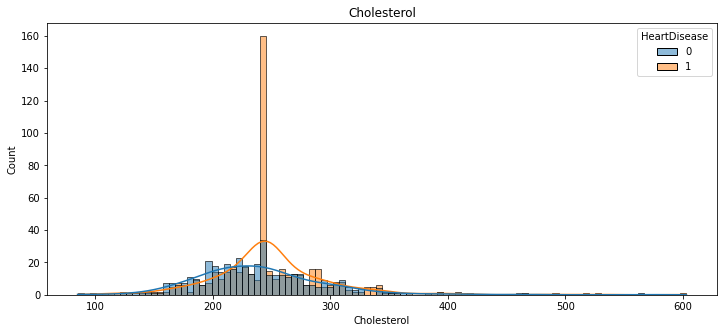

In [23]:
column_analysis('Cholesterol')

In [24]:
# Alterando valores de variáveis categoricas para valores numericos

# Colunas Sex
r_Sex = {'F':0, 'M':1}
df.Sex.replace(r_Sex, inplace=True)

# Coluna ChestPainType
r_ChestPainType = {'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3}
df.ChestPainType.replace(r_ChestPainType, inplace=True)

# Coluna RestingECG
r_RestingECG = {'Normal': 0, 'LVH': 1, 'ST': 2}
df.RestingECG.replace(r_RestingECG, inplace=True)

# Coluna ExerciseAngina
r_ExerciseAngina = {'N': 0, 'Y':1}
df.ExerciseAngina.replace(r_ExerciseAngina, inplace=True)

# Coluna ST_Slope
r_ST_Slope = {'Flat': 0, 'Up': 1, 'Down': 2}
df.ST_Slope.replace(r_ST_Slope, inplace=True)


### Analisando correlações

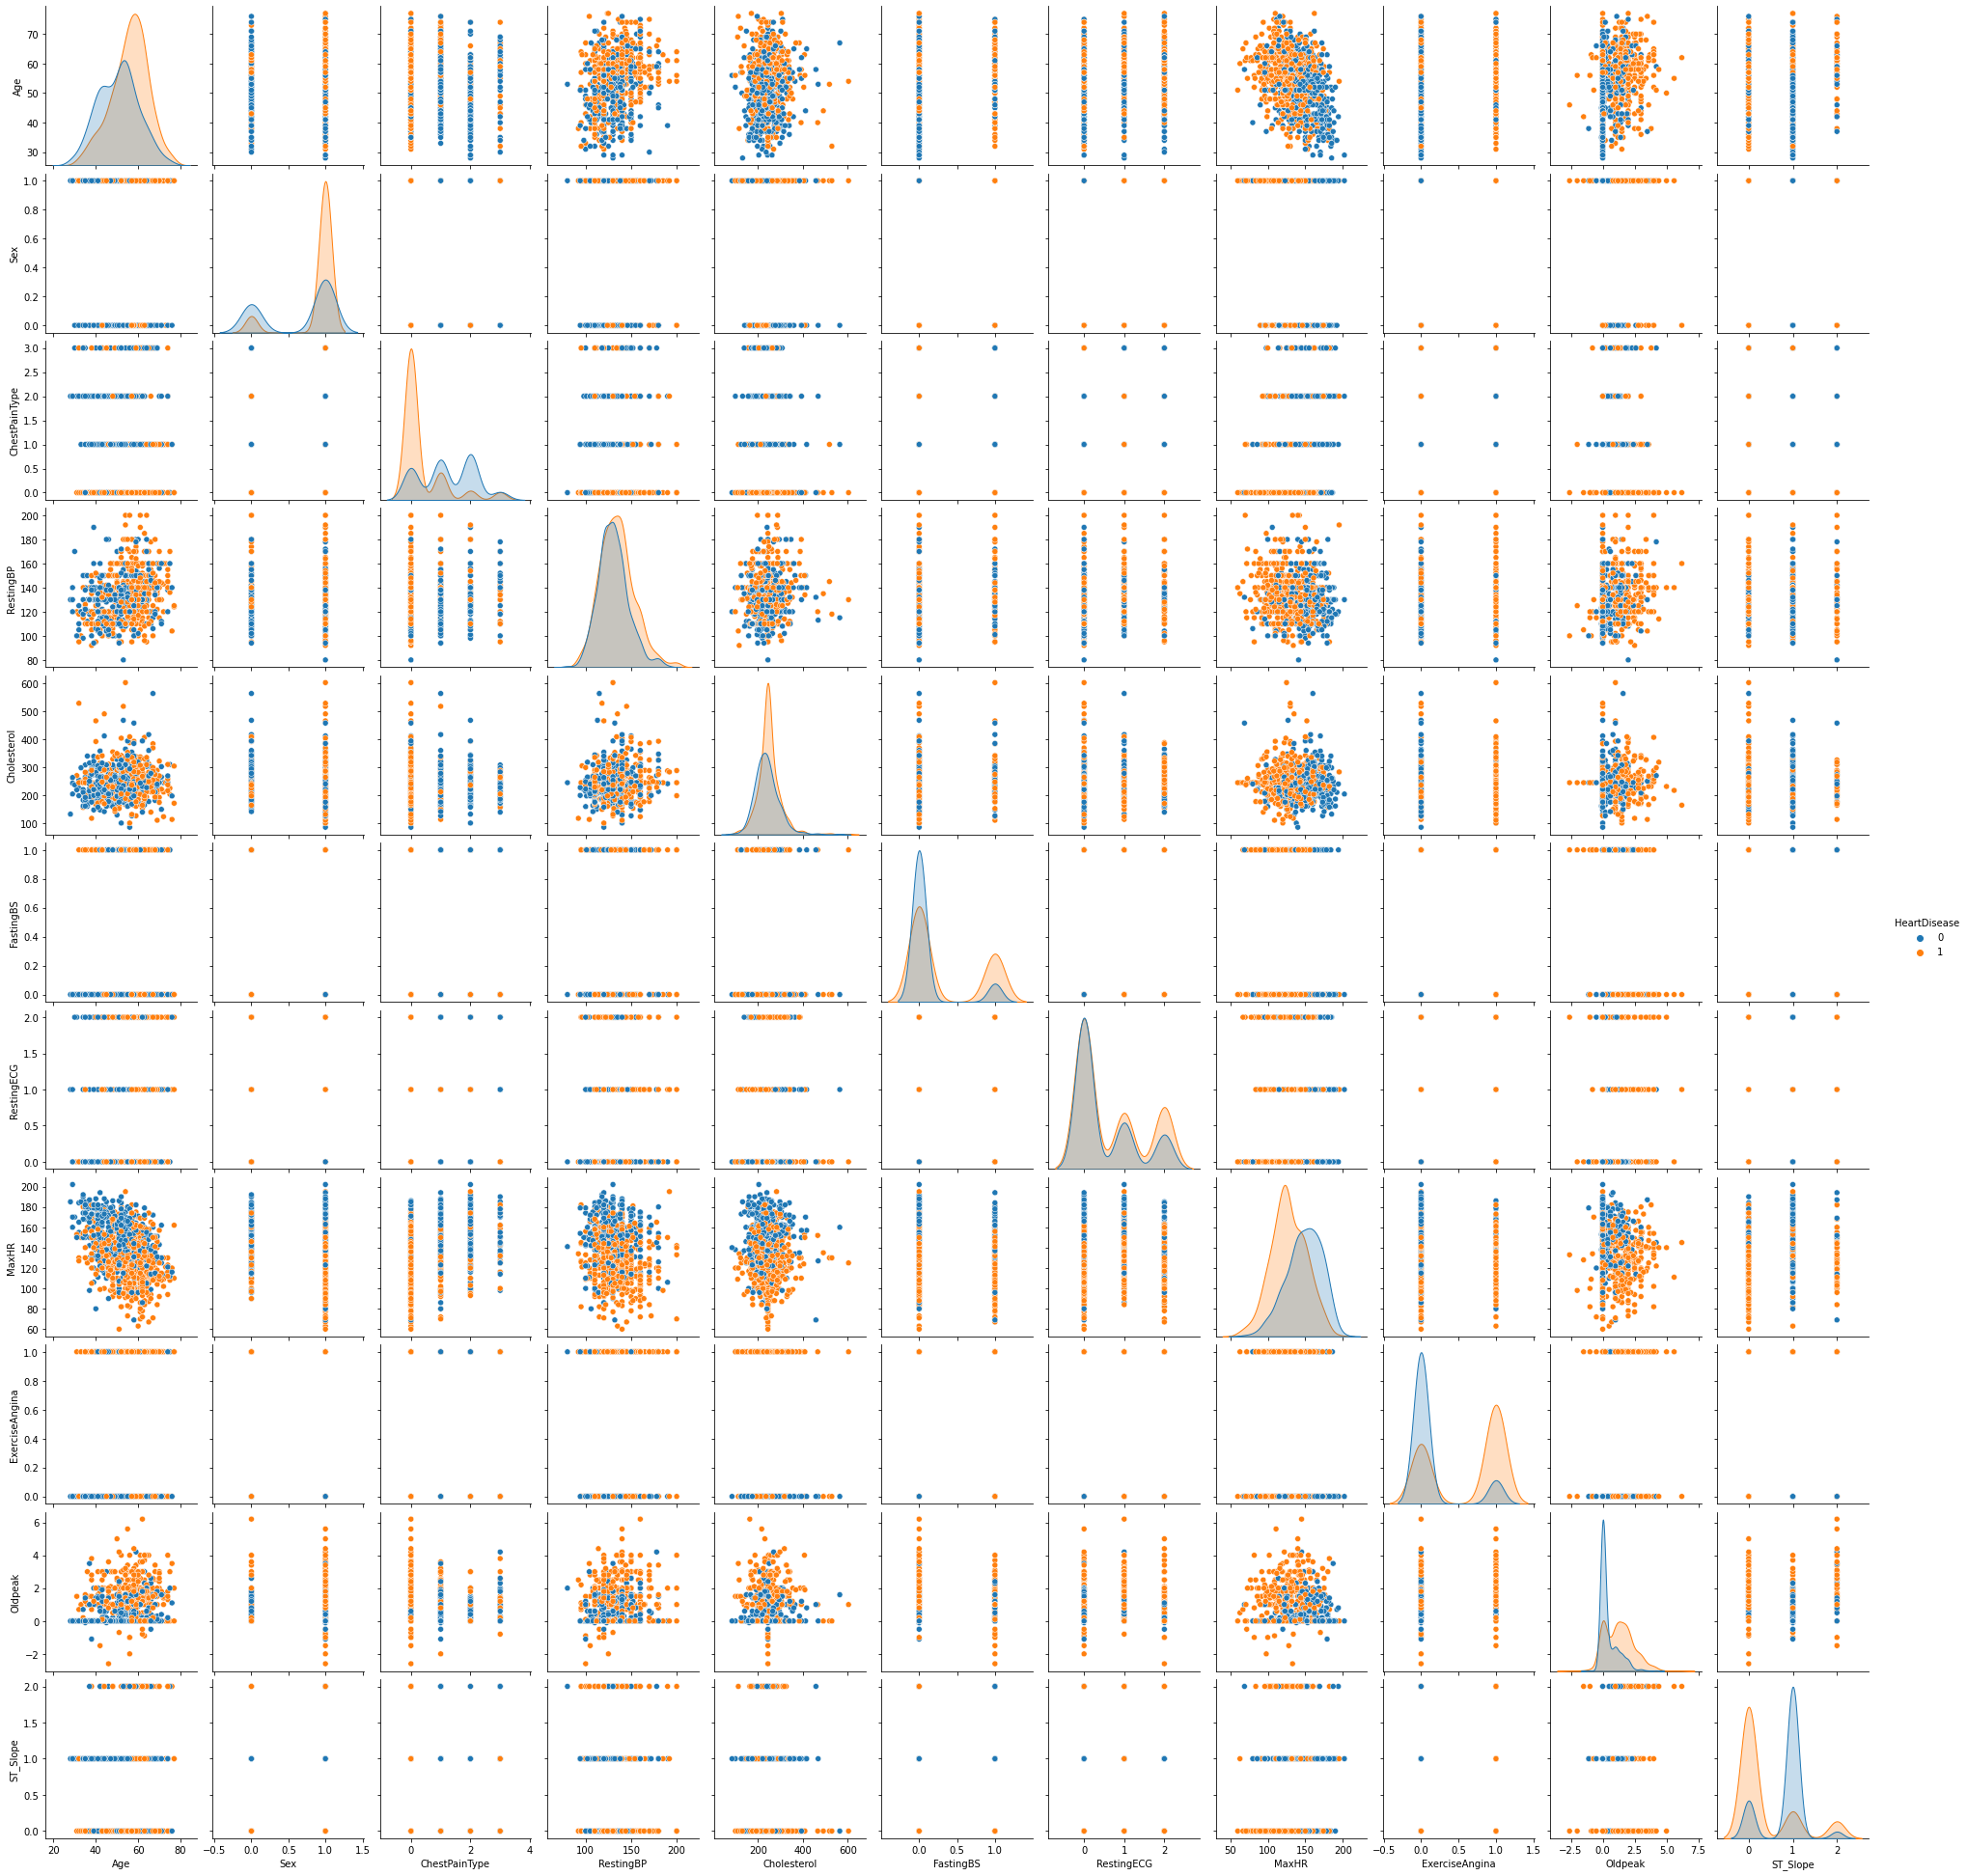

In [25]:
# Avaliando relações entre as labels
sns.pairplot(df, hue='HeartDisease',);

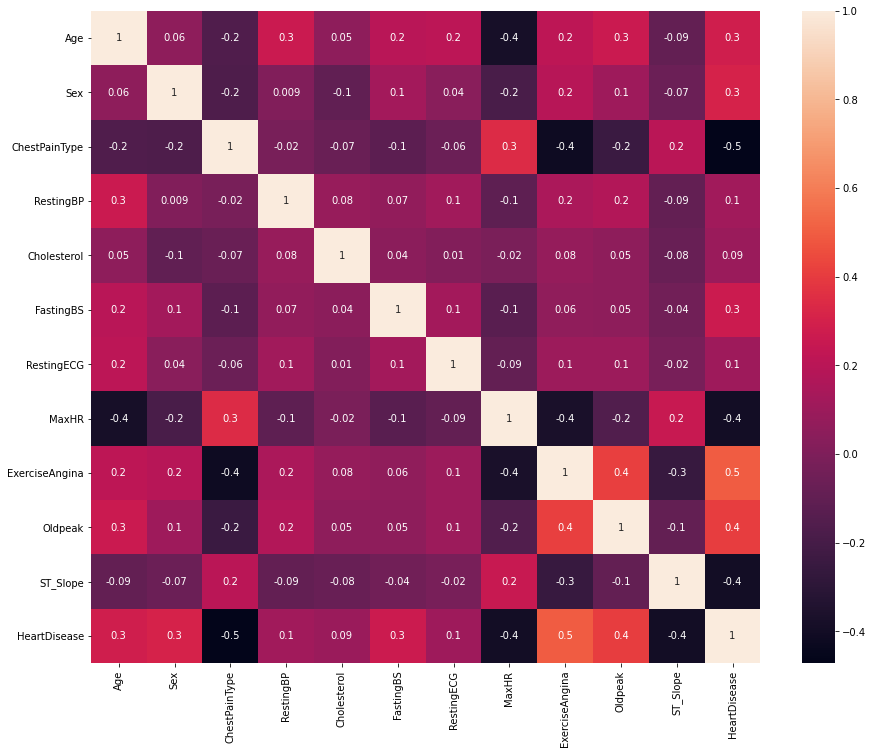

In [26]:
# Analisando correlações
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt='.1g');

In [27]:
# Analisando correlações com HeartDisease (y)
df.corr()['HeartDisease'].abs().sort_values(ascending=False)

HeartDisease      1.000000
ExerciseAngina    0.495490
ChestPainType     0.471846
Oldpeak           0.403638
MaxHR             0.401410
ST_Slope          0.397260
Sex               0.305118
Age               0.282012
FastingBS         0.267994
RestingBP         0.117990
RestingECG        0.108440
Cholesterol       0.094113
Name: HeartDisease, dtype: float64

Como todas as label apresentão forte correlação com aquela que será o y, vou manter todas as colunas.

## Modelagem

In [28]:
# Separando DataFrame em X e y
X = df.drop(columns='HeartDisease')
y = df.HeartDisease

display(X.head())
display(y.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,140,289.0,0,0,172,0,0.0,1
1,49,0,1,160,180.0,0,0,156,0,1.0,0
2,37,1,2,130,283.0,0,2,98,0,0.0,1
3,48,0,0,138,214.0,0,0,108,1,1.5,0
4,54,1,1,150,195.0,0,0,122,0,0.0,1


0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [29]:
# Separando  Dataframe em trino e test
SEED = 123
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED,)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((641, 11), (276, 11), (641,), (276,))

### Criando Baseline

In [30]:
# Criando baseline a partir do DummyClassifier

# Estanciando modelo
dummy = DummyClassifier()

# Treinando modelo
dummy.fit(X_train, y_train)

# Avaliando pontuação
dummy_score = dummy.score(X_test, y_test)

print(f'Baseline: {dummy_score*100:.2f}%')

Baseline: 53.99%


## Modelagem

In [31]:
# Modelo Support Vector Machine
svm =  SVC()

# Treinando modelo
svm.fit(X_train, y_train)

# Avaliando pontuação
score = cross_validate(svm, X_train, y_train, cv=5 )['test_score']
print(f'SupportVectorMachine apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}%')

SupportVectorMachine apresentou acurácia entre 63.28% e 74.42%


In [32]:
# Modelo de Árvore de Decisão
dtc =  DecisionTreeClassifier()

# Treinando modelo
dtc.fit(X_train, y_train)

# Avaliando pontuação
score = cross_validate(dtc, X_train, y_train, cv=5 )['test_score']
print(f'DecisionTreeClassifier apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}%')

DecisionTreeClassifier apresentou acurácia entre 75.19% e 82.03%


In [33]:
# Modelo Random Forest
rfc = RandomForestClassifier(random_state = SEED)

# Treinando modelo
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

# Avaliando pontuação
score = cross_validate(rfc, X_train, y_train, cv=5 )['test_score']
print(f'RandomForestClassifier apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}%')

RandomForestClassifier apresentou acurácia entre 84.38% e 88.28%


In [34]:
# Modelo XGBoost
xgb =  XGBClassifier()

# Treinando modelo
xgb.fit(X_train, y_train)

# Avaliando pontuação
score = cross_validate(xgb, X_train, y_train, cv=5 )['test_score']
print(f'XGBoost classifier apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}%')

XGBoost classifier apresentou acurácia entre 82.03% e 89.15%


In [35]:
# Modelo CatBoost
cat =  CatBoostClassifier(verbose=False)

# Treinando modelo
cat.fit(X_train, y_train)

# Avaliando pontuação
score = cross_validate(cat, X_train, y_train, cv=5 )['test_score']
print(f'CatBoost classifier apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}%')

CatBoost classifier apresentou acurácia entre 85.16% e 88.37%


Os modelos XGBoost e CatBoost apresentaram melhores resultados.  
Vou treinar com dados escalonados

## Otimizando Modelos

In [36]:
# Criando DataFrames escalonados para teste
# Estanciando modelo
scaler = StandardScaler()

# Estanciando modelo
X_scaler = scaler.fit_transform(X)

# Separando em treino e teste
X_train_scaler, X_test_scaler, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=SEED,)

# Visualizado dimensões
X_train_scaler.shape, X_test_scaler.shape, y_train.shape, y_test.shape

((641, 11), (276, 11), (641,), (276,))

In [37]:
# Avaliando XGBoost com dados escalonados
# Estanciando modelo
xgb = XGBClassifier()

# Treinando modelo
xgb.fit(X_train_scaler, y_train)

# Avaliando pontuação
score = cross_validate(xgb, X_train_scaler, y_train, cv=5 )['test_score']
print(f'XGBoost classifier apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}%')

XGBoost classifier apresentou acurácia entre 82.03% e 89.15%


In [38]:
# Avaliando CatBoost com dados escalonados  
# Estanciando modelo
cat =  CatBoostClassifier(verbose=False)

# Treinando modelo
cat.fit(X_train_scaler, y_train)

# Avaliando pontuação
score = cross_validate(cat, X_train_scaler, y_train, cv=5 )['test_score']
print(f'CatBoost classifier apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}%')

CatBoost classifier apresentou acurácia entre 85.16% e 88.37%


### Ajustando hiperparametros

In [39]:
# Ajuastando hiperparametros manualmente
xgb =  XGBClassifier(max_depth=3,
                     learning_rate=0.05,
                     n_estimators=95)
# Treinando modelo
xgb.fit(X_train_scaler, y_train)

# Avaliando pontuação
score = cross_validate(xgb, X_train_scaler, y_train, cv=5 )['test_score']
print(f'XGBoost classifier apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}% \
e média igual a {score.mean()*100:.2f}%')

XGBoost classifier apresentou acurácia entre 85.16% e 88.28% e média igual a 87.05%


In [40]:
# Ajuastando hiperparametros manualmente
cat =  CatBoostClassifier(verbose=False,
                          iterations=100,
                          learning_rate=0.10,
                          depth = 2                         )
# Treinando modelo
cat.fit(X_train_scaler, y_train)

# Avaliando pontuação
score = cross_validate(cat, X_train_scaler, y_train, cv=5 )['test_score']
print(f'CatBoost classifier apresentou acurácia entre {score.min()*100:.2f}% e {score.max()*100:.2f}% \
e média igual a {score.mean()*100:.2f}%')

CatBoost classifier apresentou acurácia entre 84.38% e 89.15% e média igual a 87.20%


O modelo CatBoost apresentou resultado um pouco melhor.
Vou ajustar os hiperparametros utilizando o RandomizedSearchCV

Modelo utilizado CatBoostClassifie, com hiperparametros:
{'verbose': False, 'learning_rate': 0.1, 'iterations': 175, 'depth': 5}
Acurácia estimada entre: 85.16% e 88.28%
Acurácia real: 88.41%


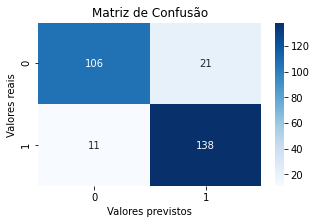

In [41]:
# Definindo grid de valores dos hiperparâmetros
grid = {'verbose':[False],
        'iterations':[50, 75, 100, 125, 150, 175, 200],
        'learning_rate':[0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'depth': [1, 2, 3, 4, 5]}

# Estanciando modelo
search = RandomizedSearchCV(CatBoostClassifier(), param_distributions=grid, n_iter=10, cv=5, random_state=SEED)

# Treinando modelo
search.fit(X_train_scaler, y_train)

# Visualizando melhores parâmetros
best_params = search.best_params_

# Treinando o modelo e fazendo previsões
cat = CatBoostClassifier(**best_params, random_state = SEED)
cat.fit(X_train_scaler, y_train)

# Prevendo valores
y_predict = cat.predict(X_test_scaler)

# Calculando a matriz de confusão e pontuação
score = cross_validate(cat, X_train_scaler, y_train, cv=5 )['test_score']
matrix = confusion_matrix(y_test, y_predict)

TN, FP, FN, TP = matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f'Modelo utilizado CatBoostClassifie, com hiperparametros:\n{best_params}')
print(f'Acurácia estimada entre: {score.min()*100:.2f}% e {score.max()*100:.2f}%')
print(f"Acurácia real: {accuracy:.2%}")

# Visualizando a matriz de confusão
plt.figure(figsize=(5, 3))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('Matriz de Confusão')
plt.show()

O modelo apresentou uma acurácia real de 88,41%. Vou rodar novamente com os dados não escalonados para avaliar os resultados.

Modelo utilizado CatBoostClassifie, com hiperparametros:
{'verbose': False, 'learning_rate': 0.1, 'iterations': 175, 'depth': 5}
Acurácia estimada entre: 85.16% e 88.28%
Acurácia real: 88.41%


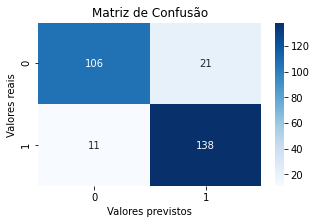

In [42]:
# Definindo grid de valores dos hiperparâmetros
grid = {'verbose':[False],
        'iterations':[50, 75, 100, 125, 150, 175, 200],
        'learning_rate':[0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
        'depth': [1, 2, 3, 4, 5]}

# Estanciando modelo
search = RandomizedSearchCV(CatBoostClassifier(), param_distributions=grid, n_iter=10, cv=5, random_state=SEED)

# Treinando modelo
search.fit(X_train, y_train)

# Visualizando melhores parâmetros
best_params = search.best_params_

# Treinando o modelo e fazendo previsões
cat = CatBoostClassifier(**best_params, random_state = SEED)
cat.fit(X_train, y_train)

# Prevendo valores
y_predict = cat.predict(X_test)

# Calculando a matriz de confusão e pontuação
score = cross_validate(cat, X_train, y_train, cv=5 )['test_score']
matrix = confusion_matrix(y_test, y_predict)

TN, FP, FN, TP = matrix.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f'Modelo utilizado CatBoostClassifie, com hiperparametros:\n{best_params}')
print(f'Acurácia estimada entre: {score.min()*100:.2f}% e {score.max()*100:.2f}%')
print(f"Acurácia real: {accuracy:.2%}")

# Visualizando a matriz de confusão
plt.figure(figsize=(5, 3))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('Matriz de Confusão')
plt.show()

O modelo retornou os mesmos resultados com os dados não escalonados.

# Resultado Final

### Modelo utilizado: *CatBoostClassifier*

### Acurácia estimada entre: 85.16% e 88.28%

### Acurácia real: 88.41%